In [1]:
# %pip install -U qiskit
from qiskit import __version__
print('Qiskit Sürümü: ', __version__)

Qiskit Sürümü:  1.0.2


## <b> Qiskit ile Kuantum Fourier Dönüşümü

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit import quantum_info
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## Kuantum Fourier Dönüşümü Devresi için Metot Tanımlama
Kontrollü faz kapılarını eklenmesi için <b>QuantumCircuit().cp($\theta$, kontrol, hedef)</b> metotu kullanılır.

In [3]:
def qft_olustur(circuit, n):
    """
    Bu metot ile bir devre hadamard ve Kontrollü faz kapıları ekler.
    Not: kübitle isim yerine indesi ile erişilebilir.
    
    Args:
        circuit: devre
        n: kübit sayısı
    
    Return:
        QuantumCircuit()
    """
    
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_olustur(circuit, n)
    return circuit

Ayrık Kuantum Fourier Dönüşümü $(x_0, ..., x_{N-1})$ hesaplama baz vektörünü $(y_0, ..., y_{N-1})$ faz vektörüne aşağıdaki denklem ile eşler:
<p><center> $y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$, </center> 
<p><center> $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$. </center>
<p>Benzer biçimde, Bir kuantum durum üzerinde $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ Kuantum Fourier Dönüşümün etkisi ile aşağıdaki denklemi kullanarak $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ duruma dönüştürür,
<p><center>$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$ </center>
<p>Benzer biçimde aşağıdaki dönüşüm de yazılabilir:
<p><center> $\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$, </center>
<br>Veya dönüşüm matrisi biçimde aşağıdaki gibi yazılabilir:
<p><center>$U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$

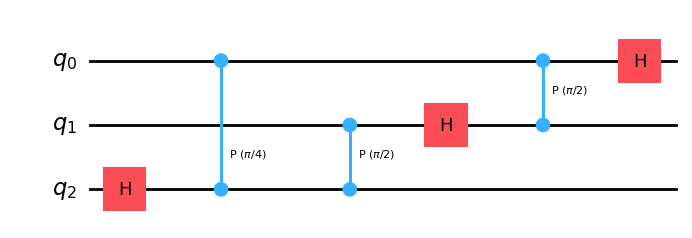

In [5]:
qubit_count = 3
fourier_circuit = QuantumCircuit(qubit_count)
qft_olustur(fourier_circuit, qubit_count)
fourier_circuit.draw(output='mpl')

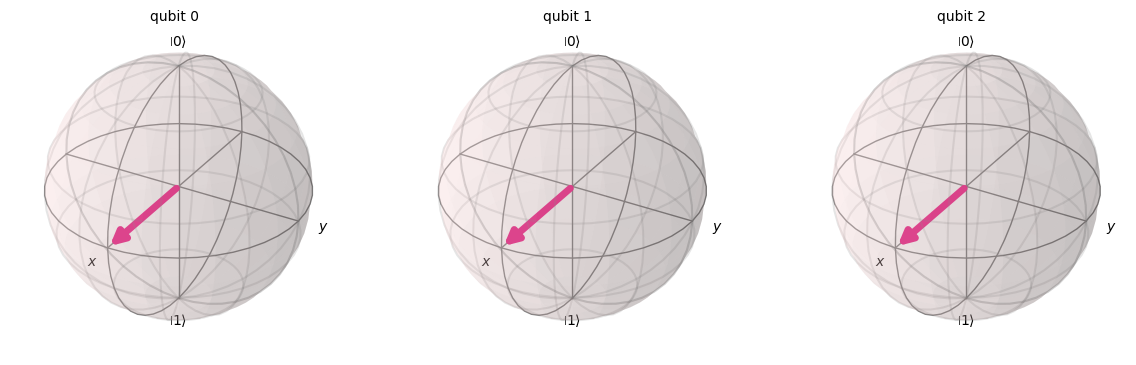

In [6]:
sim = AerSimulator()
fourier_circuit.save_statevector()
statevector = sim.run(fourier_circuit).result().get_statevector()
plot_bloch_multivector(statevector)

## Veriyi Hesaplama Bazına Kodlama

In [12]:
number = 5
sv = np.zeros(2**qubit_count)
sv[number] += 1
sv = quantum_info.Statevector(sv)
print(f'{number} sayısını hesaplama bazına kodlanırsa: ')
sv.draw(output='latex')

5 sayısını hesaplama bazına kodlanırsa: 


<IPython.core.display.Latex object>

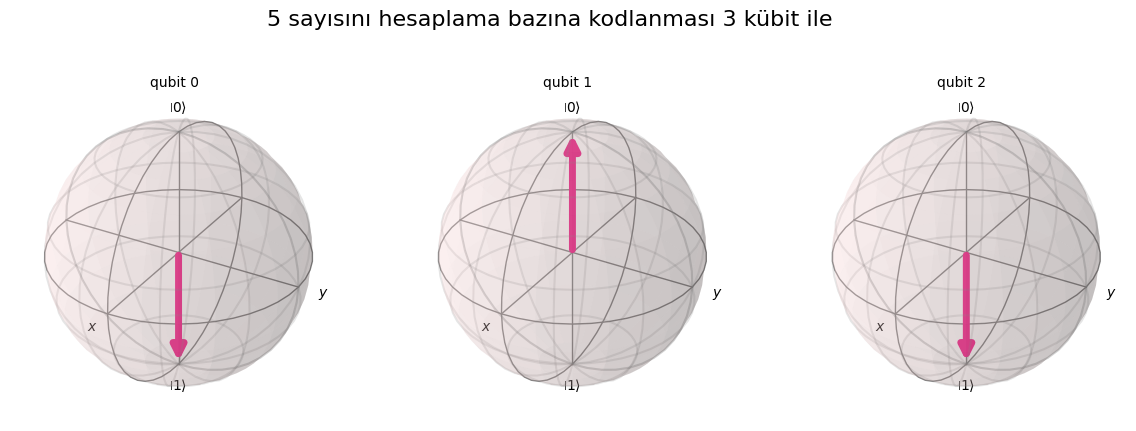

In [8]:
plot_bloch_multivector(sv, title=f'{number} sayısını hesaplama bazına kodlanması {qubit_count} kübit ile')

## Veriyi Fourier Kullanarak Faza Kodlama

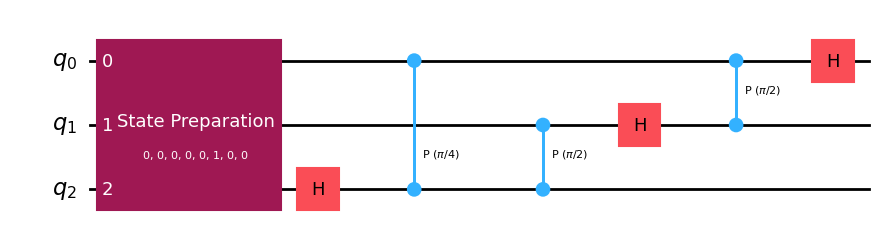

In [9]:
fourier_circuit = QuantumCircuit(qubit_count)
fourier_circuit.prepare_state(sv, range(qubit_count))
qft_olustur(fourier_circuit, qubit_count)
fourier_circuit.draw(output='mpl')

In [10]:
sav = quantum_info.Statevector(fourier_circuit)
sav.draw(output='latex')

<IPython.core.display.Latex object>

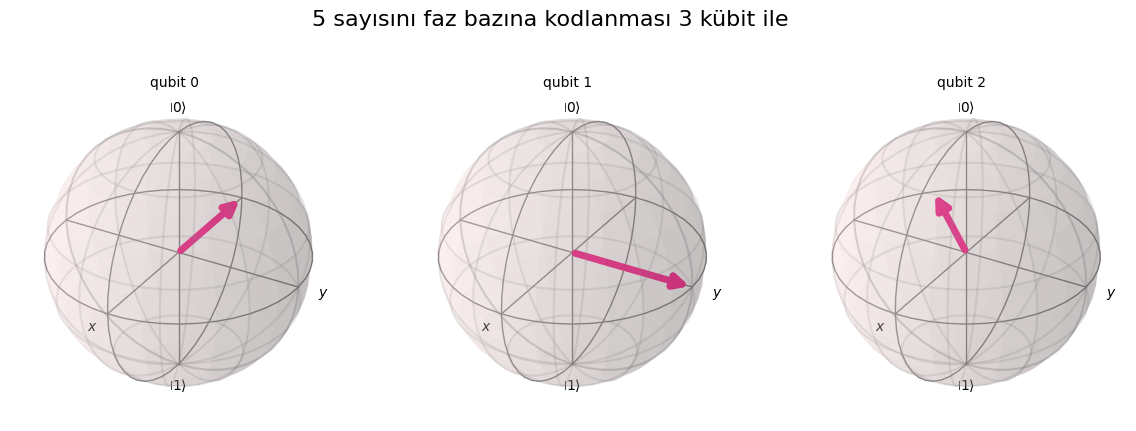

In [11]:
plot_bloch_multivector(sav, title=f'{number} sayısını faz bazına kodlanması {qubit_count} kübit ile')